In [ ]:
import pandas as pd
import numpy as np # Import numpy for nanmean

excel = pd.ExcelFile("kelp.xlsx")

# List of columns to keep
columns_to_keep = [
    'Bed Name', 'Site Code', 'Survey Date', 'Survey Day', 'Survey Month',
    'Survey Year', 'Acres', 'Temp', 'Temp 1 Shore Edge', 'Temp 1 Water Edge',
    'Temp 2 Shore Edge', 'Temp 2 Water Edge', 'Ave Shore Edge', 'Ave Temp Water Edge'
]

# List of temperature columns to average
temp_columns_to_average = [
    'Temp', 'Temp 1 Shore Edge', 'Temp 1 Water Edge', 'Temp 2 Shore Edge',
    'Temp 2 Water Edge', 'Ave Shore Edge', 'Ave Temp Water Edge'
]

# List of years to calculate average temperature for
years_to_average = ['2020','2021', '2022', '2023', '2024']

for sheet in excel.sheet_names:
    # Skip the 'Notes' sheet
    if sheet == 'Notes':
        print(f"Skipping sheet: {sheet}")
        continue

    print(f"Processing sheet: {sheet}") # Optional: To see which sheet is being processed
    df = pd.read_excel("kelp.xlsx", sheet_name=sheet)

    # Check which columns exist in the current sheet
    existing_columns = [col for col in columns_to_keep if col in df.columns]

    # If no desired columns exist, print a message and skip processing this sheet further
    if not existing_columns:
        print(f"Sheet '{sheet}' does not contain any of the desired columns. Skipping this sheet.")
        display(df.head()) # Display the head for context
        continue # Skip to the next sheet

    # Select only the existing columns
    df = df[existing_columns]

    # Calculate average temperature for specified years if temp columns exist
    if sheet in years_to_average:
        # Identify existing temperature columns to average in the current sheet
        existing_temp_columns = [col for col in temp_columns_to_average if col in df.columns]

        if existing_temp_columns:
            # Calculate the mean, ignoring NaN values
            df['Temp'] = df[existing_temp_columns].mean(axis=1, skipna=True)
            print(f"Calculated 'Average Temp' for sheet: {sheet}")
        else:
            print(f"No temperature columns found for averaging in sheet: {sheet}")
            df['Temp'] = np.nan # Add column with NaN if no temp columns exist


    # Drop rows where 'Acres' column is NaN, but only if the column exists and was selected
    if 'Acres' in df.columns:
        df = df.dropna(subset=['Acres'])
        print(f"Dropped rows with NaN in 'Acres' for sheet: {sheet}")
        display(df.head()) # Add this line to display the head of each DataFrame
    else:
        print(f"Sheet '{sheet}' does not have an 'Acres' column after selection. Skipping dropping NaN values for this sheet.")
        display(df.head()) # Display the head even if 'Acres' column is missing or not selected


    df.to_excel(f"{sheet}.xlsx", index=False)

Processing sheet: 2015
Dropped rows with NaN in 'Acres' for sheet: 2015


,Bed Name,Site Code,Survey Date,Survey Day,Survey Month,Survey Year,Acres,Temp,Ave Temp Water Edge
0,Ebey's Landing,EBL,2015-06-14,14,6,2015,9.490754,11.0,NaN
1,Ebey's Landing,EBL,2015-07-19,19,7,2015,14.626063,13.0,NaN
2,Ebey's Landing,EBL,2015-08-15,15,8,2015,18.354044,13.0,NaN
3,Ebey's Landing,EBL,2015-09-26,26,9,2015,17.885642,12.0,NaN
4,Hastie Lake,HSTL,2015-06-15,15,6,2015,13.287837,NaN,NaN


Processing sheet: 2016
Dropped rows with NaN in 'Acres' for sheet: 2016


,Bed Name,Site Code,Survey Date,Survey Day,Survey Month,Survey Year,Acres,Temp,Ave Temp Water Edge
0,Freshwater Bay 1,FWB,2016-07-30,30,7,2016,145.089653,12.0,NaN
1,Freshwater Bay 1,FWB,2016-08-19,19,8,2016,169.696118,14.0,NaN
2,Freshwater Bay 2,FWBO,2016-07-02,2,7,2016,0.706491,13.0,NaN
3,Ben Ure,BEUR,2016-07-01,1,7,2016,0.784476,12.0,NaN
4,Ben Ure,BEUR,2016-07-30,30,7,2016,0.820192,12.0,NaN


Processing sheet: 2017
Dropped rows with NaN in 'Acres' for sheet: 2017


,Bed Name,Site Code,Survey Date,Survey Day,Survey Month,Survey Year,Acres,Temp,Ave Temp Water Edge
0,Clallam Bay,CLLB,2017-07-09,9,7,2017,23.094739,13.0,NaN
1,Clallam Bay,CLLB,2017-07-23,23,7,2017,25.128053,12.0,NaN
2,Freshwater Bay 1,FWB,2017-08-20,20,8,2017,168.871267,NaN,NaN
3,Freshwater Bay 2,FWBO,2017-09-17,17,9,2017,0.929402,10.0,NaN
4,Ben Ure,BEUR,2017-05-25,25,5,2017,0.475675,9.0,NaN


Processing sheet: 2018
Dropped rows with NaN in 'Acres' for sheet: 2018


,Bed Name,Site Code,Survey Date,Survey Day,Survey Month,Survey Year,Acres,Temp,Ave Temp Water Edge
0,Clallam Bay,CLLB,2018-07-16,16,7,2018,18.767499,14.0,NaN
1,Freshwater Bay 1,FWB,2018-07-26,26,7,2018,78.006223,12.0,NaN
2,Freshwater Bay 2,FWBO,2018-08-10,10,8,2018,1.436845,13.0,NaN
3,Freshwater Bay 3,FWBO-N,2018-08-10,10,8,2018,2.489065,13.0,NaN
4,Ben Ure,BEUR,2018-06-18,18,6,2018,0.565004,12.0,NaN


Processing sheet: 2019
Dropped rows with NaN in 'Acres' for sheet: 2019


,Bed Name,Site Code,Survey Date,Survey Day,Survey Month,Survey Year,Acres,Temp,Ave Temp Water Edge
0,Clallam Bay,CLLB,2019-07-19,19,7,2019,22.331618,14.4,NaN
1,Freshwater Bay 1,FWB,2019-07-20,20,7,2019,117.860533,14.0,NaN
2,Freshwater Bay 2,FWBO,2019-07-18,18,7,2019,0.969558,15.0,NaN
3,Ebey's Landing,EBL,2019-06-21,21,6,2019,24.952333,12.0,NaN
4,Ebey's Landing,EBL,2019-07-18,18,7,2019,37.181197,12.3,NaN


Processing sheet: 2020
Calculated 'Average Temp' for sheet: 2020
Dropped rows with NaN in 'Acres' for sheet: 2020


,Bed Name,Site Code,Survey Date,Survey Day,Survey Month,Survey Year,Acres,Temp,Ave Temp Water Edge
0,Clallam Bay,CLLB,2020-07-23,23,7,2020,13.136316,12.0,12.0
1,Freshwater Bay 1,FWB,2020-08-19,19,8,2020,112.665764,12.2,12.2
2,Freshwater Bay 2,FWBO,2020-08-19,19,8,2020,0.635944,NaN,NaN
3,Lowell,LWLP,2020-08-22,22,8,2020,5.854933,13.9,13.9
4,Lowell,LWLP,2020-08-22,22,8,2020,4.915611,13.9,13.9


Processing sheet: 2021
Calculated 'Average Temp' for sheet: 2021
Dropped rows with NaN in 'Acres' for sheet: 2021


,Bed Name,Site Code,Survey Date,Survey Day,Survey Month,Survey Year,Acres,Temp,Ave Temp Water Edge
0,Clallam Bay,CLLB,2021-08-23,23,8,2021,15.315023,12.22,12.22
1,Freshwater Bay 1,FWB,2021-07-27,27,7,2021,128.509924,NaN,NaN
2,Freshwater Bay 2,FWBO,2021-09-07,7,9,2021,0.932312,11.11,11.11
3,Ebey's Landing,EBL,2021-08-11,11,8,2021,37.681341,12.00,12.00
4,Hoypus Point,HOYP,2021-06-07,7,6,2021,1.551245,11.00,11.00


Processing sheet: 2022
Calculated 'Average Temp' for sheet: 2022
Dropped rows with NaN in 'Acres' for sheet: 2022


,Bed Name,Site Code,Survey Date,Survey Day,Survey Month,Survey Year,Acres,Temp,Ave Temp Water Edge
0,Clallam Bay,CLLB,2022-08-29,29,8,2022,12.728182,12.22,12.22
1,Freshwater Bay 1,FWB,2022-07-31,31,7,2022,41.872913,13.33,13.33
2,Freshwater Bay 2,FWBO,2022-07-31,31,7,2022,0.782634,15.00,15.00
3,Freshwater Bay 3,FWBO-N,2022-07-31,31,7,2022,0.914538,NaN,NaN
4,Ebey's Landing,EBL,2022-08-23,23,8,2022,38.629817,12.25,12.25


Processing sheet: 2023
Calculated 'Average Temp' for sheet: 2023
Dropped rows with NaN in 'Acres' for sheet: 2023


,Bed Name,Site Code,Survey Date,Survey Day,Survey Month,Survey Year,Acres,Temp,Ave Temp Water Edge
0,Clallam Bay,CLLB,2023-09-02,2,9,2023,9.584521,NaN,NaN
1,Freshwater Bay 1,FWB,2023-08-14,14,8,2023,121.974427,11.4,11.4
2,Freshwater Bay 2,FWBO,2023-08-31,31,8,2023,0.586538,11.1,11.1
3,Freshwater Bay 3,FWBO-N,2023-08-31,31,8,2023,0.315308,11.1,11.1
4,Ebey's Landing,EBL,2023-08-14,14,8,2023,31.122627,12.2,12.2


Processing sheet: 2024
Calculated 'Average Temp' for sheet: 2024
Dropped rows with NaN in 'Acres' for sheet: 2024


,Bed Name,Site Code,Survey Date,Survey Day,Survey Month,Survey Year,Acres,Temp,Ave Temp Water Edge
0,Aiston Preserve,AISP,2024-07-21,21,7,2024,0.343985,14.7,14.7
1,Aiston Preserve,AISP,2024-07-21,21,7,2024,0.421390,14.7,14.7
2,Biz Point,BZPT,2024-07-09,9,7,2024,0.603576,11.1,11.1
3,Biz Point,BZPT,2024-08-06,6,8,2024,0.722723,11.0,11.0
4,Biz Point,BZPT,2024-09-16,16,9,2024,1.039652,11.1,11.1


Skipping sheet: Notes


In [ ]:
for sheet in excel.sheet_names:
    # Select only the existing columns
    df = df[existing_columns]

    # Drop rows where 'Acres' column is NaN, but only if the column exists and was selected
    if 'Temp' in df.columns:
        df = df.dropna(subset=['Temp'])
        print(f"Dropped rows with NAN in 'Temp' for sheet: {sheet}")
        display(df.head()) # Add this line to display the head of each DataFrame

Dropped rows with NAN in 'Temp' for sheet: 2015


,Bed Name,Site Code,Survey Date,Survey Day,Survey Month,Survey Year,Acres,Temp,Ave Temp Water Edge
0,Aiston Preserve,AISP,2024-07-21,21,7,2024,0.343985,14.7,14.7
1,Aiston Preserve,AISP,2024-07-21,21,7,2024,0.421390,14.7,14.7
2,Biz Point,BZPT,2024-07-09,9,7,2024,0.603576,11.1,11.1
3,Biz Point,BZPT,2024-08-06,6,8,2024,0.722723,11.0,11.0
4,Biz Point,BZPT,2024-09-16,16,9,2024,1.039652,11.1,11.1


Dropped rows with NAN in 'Temp' for sheet: 2016


,Bed Name,Site Code,Survey Date,Survey Day,Survey Month,Survey Year,Acres,Temp,Ave Temp Water Edge
0,Aiston Preserve,AISP,2024-07-21,21,7,2024,0.343985,14.7,14.7
1,Aiston Preserve,AISP,2024-07-21,21,7,2024,0.421390,14.7,14.7
2,Biz Point,BZPT,2024-07-09,9,7,2024,0.603576,11.1,11.1
3,Biz Point,BZPT,2024-08-06,6,8,2024,0.722723,11.0,11.0
4,Biz Point,BZPT,2024-09-16,16,9,2024,1.039652,11.1,11.1


Dropped rows with NAN in 'Temp' for sheet: 2017


,Bed Name,Site Code,Survey Date,Survey Day,Survey Month,Survey Year,Acres,Temp,Ave Temp Water Edge
0,Aiston Preserve,AISP,2024-07-21,21,7,2024,0.343985,14.7,14.7
1,Aiston Preserve,AISP,2024-07-21,21,7,2024,0.421390,14.7,14.7
2,Biz Point,BZPT,2024-07-09,9,7,2024,0.603576,11.1,11.1
3,Biz Point,BZPT,2024-08-06,6,8,2024,0.722723,11.0,11.0
4,Biz Point,BZPT,2024-09-16,16,9,2024,1.039652,11.1,11.1


Dropped rows with NAN in 'Temp' for sheet: 2018


,Bed Name,Site Code,Survey Date,Survey Day,Survey Month,Survey Year,Acres,Temp,Ave Temp Water Edge
0,Aiston Preserve,AISP,2024-07-21,21,7,2024,0.343985,14.7,14.7
1,Aiston Preserve,AISP,2024-07-21,21,7,2024,0.421390,14.7,14.7
2,Biz Point,BZPT,2024-07-09,9,7,2024,0.603576,11.1,11.1
3,Biz Point,BZPT,2024-08-06,6,8,2024,0.722723,11.0,11.0
4,Biz Point,BZPT,2024-09-16,16,9,2024,1.039652,11.1,11.1


Dropped rows with NAN in 'Temp' for sheet: 2019


,Bed Name,Site Code,Survey Date,Survey Day,Survey Month,Survey Year,Acres,Temp,Ave Temp Water Edge
0,Aiston Preserve,AISP,2024-07-21,21,7,2024,0.343985,14.7,14.7
1,Aiston Preserve,AISP,2024-07-21,21,7,2024,0.421390,14.7,14.7
2,Biz Point,BZPT,2024-07-09,9,7,2024,0.603576,11.1,11.1
3,Biz Point,BZPT,2024-08-06,6,8,2024,0.722723,11.0,11.0
4,Biz Point,BZPT,2024-09-16,16,9,2024,1.039652,11.1,11.1


Dropped rows with NAN in 'Temp' for sheet: 2020


,Bed Name,Site Code,Survey Date,Survey Day,Survey Month,Survey Year,Acres,Temp,Ave Temp Water Edge
0,Aiston Preserve,AISP,2024-07-21,21,7,2024,0.343985,14.7,14.7
1,Aiston Preserve,AISP,2024-07-21,21,7,2024,0.421390,14.7,14.7
2,Biz Point,BZPT,2024-07-09,9,7,2024,0.603576,11.1,11.1
3,Biz Point,BZPT,2024-08-06,6,8,2024,0.722723,11.0,11.0
4,Biz Point,BZPT,2024-09-16,16,9,2024,1.039652,11.1,11.1


Dropped rows with NAN in 'Temp' for sheet: 2021


,Bed Name,Site Code,Survey Date,Survey Day,Survey Month,Survey Year,Acres,Temp,Ave Temp Water Edge
0,Aiston Preserve,AISP,2024-07-21,21,7,2024,0.343985,14.7,14.7
1,Aiston Preserve,AISP,2024-07-21,21,7,2024,0.421390,14.7,14.7
2,Biz Point,BZPT,2024-07-09,9,7,2024,0.603576,11.1,11.1
3,Biz Point,BZPT,2024-08-06,6,8,2024,0.722723,11.0,11.0
4,Biz Point,BZPT,2024-09-16,16,9,2024,1.039652,11.1,11.1


Dropped rows with NAN in 'Temp' for sheet: 2022


,Bed Name,Site Code,Survey Date,Survey Day,Survey Month,Survey Year,Acres,Temp,Ave Temp Water Edge
0,Aiston Preserve,AISP,2024-07-21,21,7,2024,0.343985,14.7,14.7
1,Aiston Preserve,AISP,2024-07-21,21,7,2024,0.421390,14.7,14.7
2,Biz Point,BZPT,2024-07-09,9,7,2024,0.603576,11.1,11.1
3,Biz Point,BZPT,2024-08-06,6,8,2024,0.722723,11.0,11.0
4,Biz Point,BZPT,2024-09-16,16,9,2024,1.039652,11.1,11.1


Dropped rows with NAN in 'Temp' for sheet: 2023


,Bed Name,Site Code,Survey Date,Survey Day,Survey Month,Survey Year,Acres,Temp,Ave Temp Water Edge
0,Aiston Preserve,AISP,2024-07-21,21,7,2024,0.343985,14.7,14.7
1,Aiston Preserve,AISP,2024-07-21,21,7,2024,0.421390,14.7,14.7
2,Biz Point,BZPT,2024-07-09,9,7,2024,0.603576,11.1,11.1
3,Biz Point,BZPT,2024-08-06,6,8,2024,0.722723,11.0,11.0
4,Biz Point,BZPT,2024-09-16,16,9,2024,1.039652,11.1,11.1


Dropped rows with NAN in 'Temp' for sheet: 2024


,Bed Name,Site Code,Survey Date,Survey Day,Survey Month,Survey Year,Acres,Temp,Ave Temp Water Edge
0,Aiston Preserve,AISP,2024-07-21,21,7,2024,0.343985,14.7,14.7
1,Aiston Preserve,AISP,2024-07-21,21,7,2024,0.421390,14.7,14.7
2,Biz Point,BZPT,2024-07-09,9,7,2024,0.603576,11.1,11.1
3,Biz Point,BZPT,2024-08-06,6,8,2024,0.722723,11.0,11.0
4,Biz Point,BZPT,2024-09-16,16,9,2024,1.039652,11.1,11.1


Dropped rows with NAN in 'Temp' for sheet: Notes


,Bed Name,Site Code,Survey Date,Survey Day,Survey Month,Survey Year,Acres,Temp,Ave Temp Water Edge
0,Aiston Preserve,AISP,2024-07-21,21,7,2024,0.343985,14.7,14.7
1,Aiston Preserve,AISP,2024-07-21,21,7,2024,0.421390,14.7,14.7
2,Biz Point,BZPT,2024-07-09,9,7,2024,0.603576,11.1,11.1
3,Biz Point,BZPT,2024-08-06,6,8,2024,0.722723,11.0,11.0
4,Biz Point,BZPT,2024-09-16,16,9,2024,1.039652,11.1,11.1


In [ ]:
df.columns

Index(['Bed Name', 'Site Code', 'Survey Date', 'Survey Day', 'Survey Month',
       'Survey Year', 'Acres', 'Temp', 'Ave Temp Water Edge'],
      dtype='object')

In [ ]:
df.drop(columns=['Ave Temp Water Edge'])

,Bed Name,Site Code,Survey Date,Survey Day,Survey Month,Survey Year,Acres,Temp
0,Aiston Preserve,AISP,2024-07-21,21,7,2024,0.343985,14.700
1,Aiston Preserve,AISP,2024-07-21,21,7,2024,0.421390,14.700
2,Biz Point,BZPT,2024-07-09,9,7,2024,0.603576,11.100
3,Biz Point,BZPT,2024-08-06,6,8,2024,0.722723,11.000
4,Biz Point,BZPT,2024-09-16,16,9,2024,1.039652,11.100
5,Biz Point South,BZPT-S,2024-09-16,16,9,2024,1.790402,11.100
6,Cherry Point-Gulf Rd,CHPT,2024-08-04,4,8,2024,21.036723,14.700
7,Cherry Point-Gulf Rd,CHPT,2024-09-01,1,9,2024,24.558852,13.900
8,Coffin Rocks,COFF,2024-06-20,20,6,2024,1.046606,11.100
9,Coffin Rocks,COFF,2024-07-19,19,7,2024,1.475281,12.200


In [ ]:
df.columns

Index(['Bed Name', 'Site Code', 'Survey Date', 'Survey Day', 'Survey Month',
       'Survey Year', 'Acres', 'Temp', 'Ave Temp Water Edge'],
      dtype='object')

In [ ]:
import pandas as pd
import os

# Get a list of all processed Excel files (excluding the original and notes)
processed_files = [f for f in os.listdir('.') if f.endswith('.xlsx') and f not in ['kelp.xlsx', 'Notes.xlsx']]

# Create an empty list to store DataFrames
df_list = []

# Read each processed Excel file and append its DataFrame to the list
for file in processed_files:
    try:
        df = pd.read_excel(file)
        df_list.append(df)
        print(f"Successfully read {file}")
    except Exception as e:
        print(f"Error reading {file}: {e}")

# Concatenate all DataFrames in the list
if df_list:
    merged_df = pd.concat(df_list, ignore_index=True)
    print("\nMerged DataFrame created:")
    display(merged_df.head())
    print("\nInfo of the merged DataFrame:")
    merged_df.info()

    # Drop the 'Ave Temp Water Edge' column after merging
    if 'Ave Temp Water Edge' in merged_df.columns:
        merged_df = merged_df.drop(columns=['Ave Temp Water Edge'])
        print("\n'Ave Temp Water Edge' column dropped from merged DataFrame.")
    else:
        print("\n'Ave Temp Water Edge' column not found in merged DataFrame.")


    # Sort the merged DataFrame by 'Survey Year'
    merged_df = merged_df.sort_values(by='Survey Year').reset_index(drop=True)
    print("\nMerged DataFrame sorted by year:")
    display(merged_df.head())

else:
    print("No processed Excel files found to merge.")

Successfully read 2023.xlsx
Successfully read 2015.xlsx
Successfully read 2020.xlsx
Successfully read 2016.xlsx
Successfully read 2018.xlsx
Successfully read 2017.xlsx
Successfully read 2022.xlsx
Successfully read 2021.xlsx
Successfully read 2019.xlsx
Successfully read 2024.xlsx

Merged DataFrame created:


,Bed Name,Site Code,Survey Date,Survey Day,Survey Month,Survey Year,Acres,Temp,Ave Temp Water Edge
0,Clallam Bay,CLLB,2023-09-02,2,9,2023,9.584521,NaN,NaN
1,Freshwater Bay 1,FWB,2023-08-14,14,8,2023,121.974427,11.4,11.4
2,Freshwater Bay 2,FWBO,2023-08-31,31,8,2023,0.586538,11.1,11.1
3,Freshwater Bay 3,FWBO-N,2023-08-31,31,8,2023,0.315308,11.1,11.1
4,Ebey's Landing,EBL,2023-08-14,14,8,2023,31.122627,12.2,12.2



Info of the merged DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 539 entries, 0 to 538
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Bed Name             539 non-null    object        
 1   Site Code            539 non-null    object        
 2   Survey Date          539 non-null    datetime64[ns]
 3   Survey Day           539 non-null    int64         
 4   Survey Month         539 non-null    int64         
 5   Survey Year          539 non-null    int64         
 6   Acres                539 non-null    float64       
 7   Temp                 463 non-null    float64       
 8   Ave Temp Water Edge  208 non-null    float64       
dtypes: datetime64[ns](1), float64(3), int64(3), object(2)
memory usage: 38.0+ KB

'Ave Temp Water Edge' column dropped from merged DataFrame.

Merged DataFrame sorted by year:


,Bed Name,Site Code,Survey Date,Survey Day,Survey Month,Survey Year,Acres,Temp
0,Ebey's Landing,EBL,2015-06-14,14,6,2015,9.490754,11.0
1,Ebey's Landing,EBL,2015-07-19,19,7,2015,14.626063,13.0
2,Ebey's Landing,EBL,2015-08-15,15,8,2015,18.354044,13.0
3,Ebey's Landing,EBL,2015-09-26,26,9,2015,17.885642,12.0
4,Hastie Lake,HSTL,2015-06-15,15,6,2015,13.287837,NaN


In [ ]:
# Drop NAN values for temp after merging
if 'Temp' in merged_df.columns:
    merged_df = merged_df.dropna(subset=['Temp'])

In [ ]:
merged_df.tail()

,Bed Name,Site Code,Survey Date,Survey Day,Survey Month,Survey Year,Acres,Temp,Previous Year Temp,Two Years Ago Temp
407,Shannon Point West,SHPT-W,2023-09-01,1,9,2023,4.720687,13.4,12.0,11.11
458,Shannon Point West,SHPT-W,2024-06-19,19,6,2024,0.665673,12.0,13.4,12.00
460,Shannon Point West,SHPT-W,2024-07-17,17,7,2024,0.530314,14.4,12.0,13.40
461,Shannon Point West,SHPT-W,2024-08-16,16,8,2024,6.095017,12.2,14.4,12.00
462,Shannon Point West,SHPT-W,2024-09-14,14,9,2024,5.835066,12.2,12.2,14.40


In [ ]:
# Save the merged DataFrame to a CSV file
output_csv_path = "merged_kelp_data.csv" # You can change the filename if you like
merged_df.to_csv(output_csv_path, index=False)

print(f"Merged DataFrame saved to '{output_csv_path}'")

Merged DataFrame saved to 'merged_kelp_data.csv'


In [ ]:
merged_df = pd.read_csv("merged_kelp_data.csv")

##Correlation matrices

All beds correlation

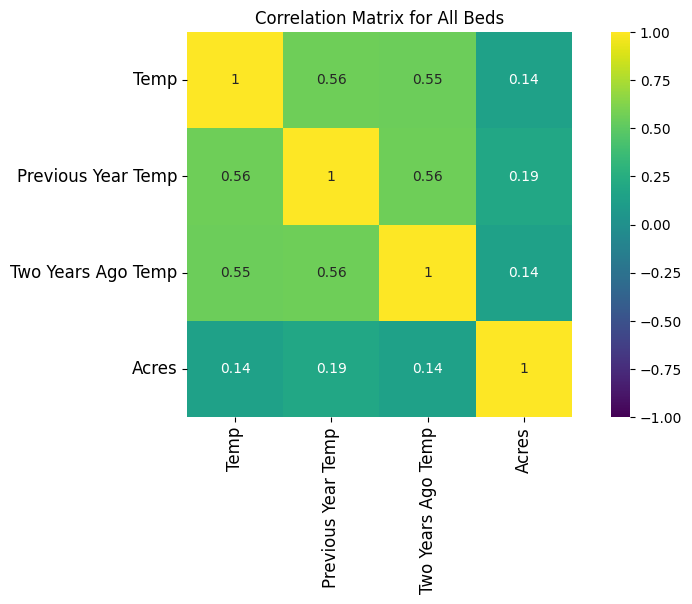

In [104]:
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf

# Ensure 'Survey Date' is in datetime format for sorting
merged_df['Survey Date'] = pd.to_datetime(merged_df['Survey Date'])

# Drop duplicate rows based on 'Bed Name', 'Site Code', and 'Survey Date'
merged_df_deduplicated = merged_df.drop_duplicates(subset=['Bed Name', 'Site Code', 'Survey Date'], keep='first').copy()

# Sort by Bed Name/Site Code and Survey Date to ensure correct lagging
merged_df_deduplicated = merged_df_deduplicated.sort_values(by=['Bed Name', 'Site Code', 'Survey Date'])

# Calculate Previous Year Temp by grouping and shifting
# Assuming 'Survey Year' is sufficient for lagging by a year
# If there are multiple surveys within a year for the same site, this might need adjustment
merged_df_deduplicated['Previous Year Temp'] = merged_df_deduplicated.groupby(['Bed Name', 'Site Code'])['Temp'].shift(1)

merged_df_deduplicated['Two Years Ago Temp'] = merged_df_deduplicated.groupby(['Bed Name', 'Site Code'])['Temp'].shift(2)

predictor_variables = ['Temp', 'Survey Date', 'Previous Year Temp', 'Two Years Ago Temp']

# Filter for numerical predictors that actually exist in the DataFrame
numerical_predictors = merged_df_deduplicated[predictor_variables].select_dtypes(include='number').columns.to_list()

# Add the 'Previous Year Temp' column to the list if it exists
if 'Previous Year Temp' in merged_df_deduplicated.columns:
    numerical_predictors.append('Previous Year Temp')
    # Remove duplicates if any
    numerical_predictors = list(dict.fromkeys(numerical_predictors))

# Drop rows with NaN values in the relevant columns before correlation
merged_df_cleaned = merged_df_deduplicated.dropna(subset=[col for col in ['Temp', 'Previous Year Temp', 'Two Years Ago Temp'] if col in merged_df_deduplicated.columns])

corr_matrix = merged_df_cleaned[numerical_predictors + ["Acres"]].corr()

plt.figure(figsize=(10, 5))

sns.heatmap(
    corr_matrix, vmax=1, vmin=-1, square=True, annot=True, cmap="viridis"
)

plt.tick_params(labelsize=12)
plt.title('Correlation Matrix for All Beds')
plt.show()

In [108]:
print(f"Number of rows assessed for correlation in all beds: {len(merged_df_cleaned)}")

Number of rows assessed for correlation in all beds: 321


Note that before removing duplicates the number of rows were 375

In [109]:
display(merged_df_cleaned.info())

<class 'pandas.core.frame.DataFrame'>
Index: 321 entries, 259 to 462
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Bed Name            321 non-null    object        
 1   Site Code           321 non-null    object        
 2   Survey Date         321 non-null    datetime64[ns]
 3   Survey Day          321 non-null    int64         
 4   Survey Month        321 non-null    int64         
 5   Survey Year         321 non-null    int64         
 6   Acres               321 non-null    float64       
 7   Temp                321 non-null    float64       
 8   Previous Year Temp  321 non-null    float64       
 9   Two Years Ago Temp  321 non-null    float64       
dtypes: datetime64[ns](1), float64(4), int64(3), object(2)
memory usage: 27.6+ KB


None

In [110]:
display(merged_df_cleaned.head(20))

,Bed Name,Site Code,Survey Date,Survey Day,Survey Month,Survey Year,Acres,Temp,Previous Year Temp,Two Years Ago Temp
259,Aiston Preserve,AISP,2020-07-20,20,7,2020,0.327542,15.00,16.00,16.00
321,Aiston Preserve,AISP,2021-07-27,27,7,2021,0.207529,14.44,15.00,16.00
348,Aiston Preserve,AISP,2022-07-31,31,7,2022,0.296172,20.00,14.44,15.00
392,Aiston Preserve,AISP,2023-07-20,20,7,2023,0.357851,12.20,20.00,14.44
434,Aiston Preserve,AISP,2024-07-21,21,7,2024,0.421390,14.70,12.20,20.00
19,Ben Ure,BEUR,2016-08-17,17,8,2016,1.309903,13.00,12.00,12.00
18,Ben Ure,BEUR,2016-08-30,30,8,2016,0.998759,12.00,13.00,12.00
31,Ben Ure,BEUR,2016-09-04,4,9,2016,1.038912,14.00,12.00,13.00
119,Ben Ure,BEUR,2017-05-25,25,5,2017,0.475675,9.00,14.00,12.00
120,Ben Ure,BEUR,2017-06-23,23,6,2017,0.850747,10.00,9.00,14.00


Correlation for all beds in July

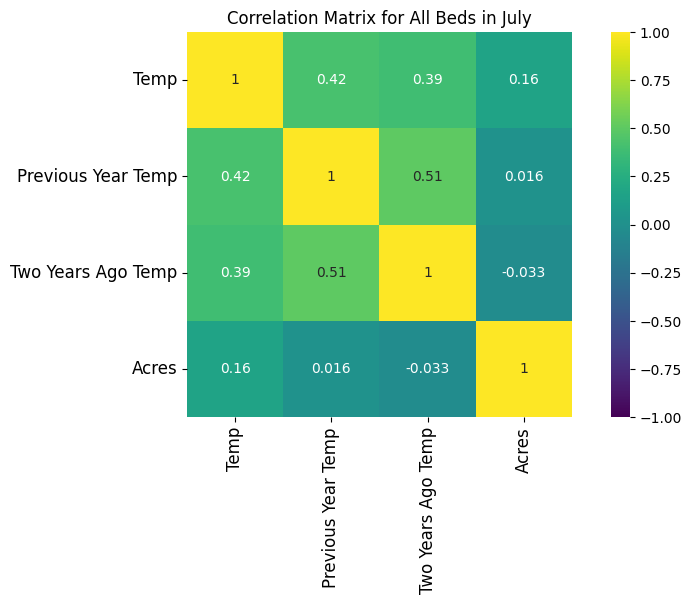

In [114]:

# Ensure 'Survey Date' is in datetime format for sorting
merged_df['Survey Date'] = pd.to_datetime(merged_df['Survey Date'])

merged_july_df = merged_df[(merged_df['Survey Month'] == 7)].copy()

# Drop duplicate rows based on 'Bed Name', 'Site Code', and 'Survey Date'
merged_july_df = merged_july_df.drop_duplicates(subset=['Bed Name', 'Site Code', 'Survey Date'], keep='first').copy()

# Sort by Bed Name/Site Code and Survey Date to ensure correct lagging
merged_july_df = merged_july_df.sort_values(by=['Bed Name', 'Site Code', 'Survey Date'])

# Calculate Previous Year Temp by grouping and shifting
# Assuming 'Survey Year' is sufficient for lagging by a year
# If there are multiple surveys within a year for the same site, this might need adjustment
merged_july_df['Previous Year Temp'] = merged_july_df.groupby(['Bed Name', 'Site Code'])['Temp'].shift(1)

merged_july_df['Two Years Ago Temp'] = merged_july_df.groupby(['Bed Name', 'Site Code'])['Temp'].shift(2)

predictor_variables_july = ['Temp', 'Survey Date', 'Previous Year Temp', 'Two Years Ago Temp']

# Filter for numerical predictors that actually exist in the DataFrame
numerical_predictors_july = merged_july_df[predictor_variables_july].select_dtypes(include='number').columns.to_list()

# Add the 'Previous Year Temp' column to the list if it exists
if 'Previous Year Temp' in merged_july_df.columns:
    numerical_predictors_july.append('Previous Year Temp')
    # Remove duplicates if any
    numerical_predictors_july = list(dict.fromkeys(numerical_predictors_july))

# Drop rows with NaN values in the relevant columns before correlation
merged_july_df_cleaned = merged_july_df.dropna(subset=[col for col in ['Temp', 'Previous Year Temp', 'Two Years Ago Temp'] if col in merged_july_df.columns])

corr_matrix = merged_july_df_cleaned[numerical_predictors_july + ["Acres"]].corr()

plt.figure(figsize=(10, 5))

sns.heatmap(
    corr_matrix, vmax=1, vmin=-1, square=True, annot=True, cmap="viridis"
)

plt.tick_params(labelsize=12)
plt.title('Correlation Matrix for All Beds in July')
plt.show()

In [115]:
print(f"Number of rows assessed for correlation in all beds in July: {len(merged_july_df_cleaned)}")

Number of rows assessed for correlation in all beds in July: 76


Correlation for all beds in August

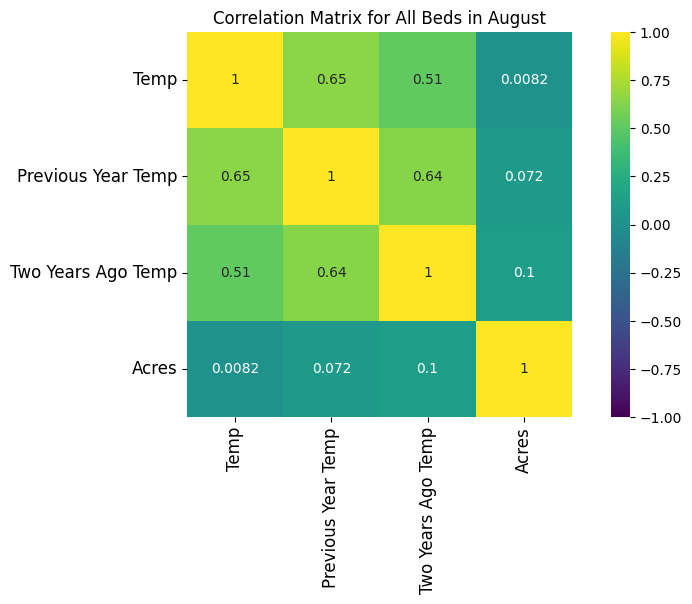

In [116]:

# Ensure 'Survey Date' is in datetime format for sorting
merged_df['Survey Date'] = pd.to_datetime(merged_df['Survey Date'])

merged_aug_df = merged_df[(merged_df['Survey Month'] == 8)].copy()

# Drop duplicate rows based on 'Bed Name', 'Site Code', and 'Survey Date'
merged_aug_df = merged_aug_df.drop_duplicates(subset=['Bed Name', 'Site Code', 'Survey Date'], keep='first').copy()

# Sort by Bed Name/Site Code and Survey Date to ensure correct lagging
merged_aug_df = merged_aug_df.sort_values(by=['Bed Name', 'Site Code', 'Survey Date'])

# Calculate Previous Year Temp by grouping and shifting
# Assuming 'Survey Year' is sufficient for lagging by a year
# If there are multiple surveys within a year for the same site, this might need adjustment
merged_aug_df['Previous Year Temp'] = merged_aug_df.groupby(['Bed Name', 'Site Code'])['Temp'].shift(1)

merged_aug_df['Two Years Ago Temp'] = merged_aug_df.groupby(['Bed Name', 'Site Code'])['Temp'].shift(2)

predictor_variables_aug = ['Temp', 'Survey Date', 'Previous Year Temp', 'Two Years Ago Temp']

# Filter for numerical predictors that actually exist in the DataFrame
numerical_predictors_aug = merged_aug_df[predictor_variables_aug].select_dtypes(include='number').columns.to_list()

# Add the 'Previous Year Temp' column to the list if it exists
if 'Previous Year Temp' in merged_aug_df.columns:
    numerical_predictors_aug.append('Previous Year Temp')
    # Remove duplicates if any
    numerical_predictors_aug = list(dict.fromkeys(numerical_predictors_aug))

# Drop rows with NaN values in the relevant columns before correlation
merged_aug_df_cleaned = merged_aug_df.dropna(subset=[col for col in ['Temp', 'Previous Year Temp', 'Two Years Ago Temp'] if col in merged_aug_df.columns])

corr_matrix = merged_aug_df_cleaned[numerical_predictors_aug + ["Acres"]].corr()

plt.figure(figsize=(10, 5))

sns.heatmap(
    corr_matrix, vmax=1, vmin=-1, square=True, annot=True, cmap="viridis"
)

plt.tick_params(labelsize=12)
plt.title('Correlation Matrix for All Beds in August')
plt.show()

In [117]:
print(f"Number of rows assessed for correlation in all beds in August: {len(merged_aug_df_cleaned)}")

Number of rows assessed for correlation in all beds in August: 89


Correlation for All Beds in September

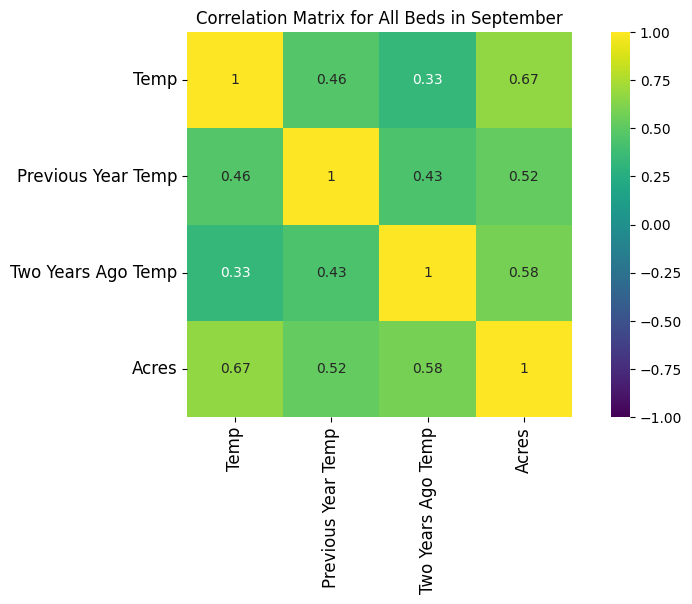

In [118]:

# Ensure 'Survey Date' is in datetime format for sorting
merged_df['Survey Date'] = pd.to_datetime(merged_df['Survey Date'])

merged_sep_df = merged_df[(merged_df['Survey Month'] == 9)].copy()

# Drop duplicate rows based on 'Bed Name', 'Site Code', and 'Survey Date'
merged_sep_df = merged_sep_df.drop_duplicates(subset=['Bed Name', 'Site Code', 'Survey Date'], keep='first').copy()

# Sort by Bed Name/Site Code and Survey Date to ensure correct lagging
merged_sep_df = merged_sep_df.sort_values(by=['Bed Name', 'Site Code', 'Survey Date'])

# Calculate Previous Year Temp by grouping and shifting
# Assuming 'Survey Year' is sufficient for lagging by a year
# If there are multiple surveys within a year for the same site, this might need adjustment
merged_sep_df['Previous Year Temp'] = merged_sep_df.groupby(['Bed Name', 'Site Code'])['Temp'].shift(1)

merged_sep_df['Two Years Ago Temp'] = merged_sep_df.groupby(['Bed Name', 'Site Code'])['Temp'].shift(2)

predictor_variables_sep = ['Temp', 'Survey Date', 'Previous Year Temp', 'Two Years Ago Temp']

# Filter for numerical predictors that actually exist in the DataFrame
numerical_predictors_sep = merged_sep_df[predictor_variables_sep].select_dtypes(include='number').columns.to_list()

# Add the 'Previous Year Temp' column to the list if it exists
if 'Previous Year Temp' in merged_sep_df.columns:
    numerical_predictors_sep.append('Previous Year Temp')
    # Remove duplicates if any
    numerical_predictors_sep = list(dict.fromkeys(numerical_predictors_sep))

# Drop rows with NaN values in the relevant columns before correlation
merged_sep_df_cleaned = merged_sep_df.dropna(subset=[col for col in ['Temp', 'Previous Year Temp', 'Two Years Ago Temp'] if col in merged_sep_df.columns])

corr_matrix = merged_sep_df_cleaned[numerical_predictors_sep + ["Acres"]].corr()

plt.figure(figsize=(10, 5))

sns.heatmap(
    corr_matrix, vmax=1, vmin=-1, square=True, annot=True, cmap="viridis"
)

plt.tick_params(labelsize=12)
plt.title('Correlation Matrix for All Beds in September')
plt.show()

In [119]:
print(f"Number of rows assessed for correlation in all beds in September: {len(merged_sep_df_cleaned)}")

Number of rows assessed for correlation in all beds in September: 30


##Coffin Rocks correlation matrices

Correlation Matrix by bed name and ALL months

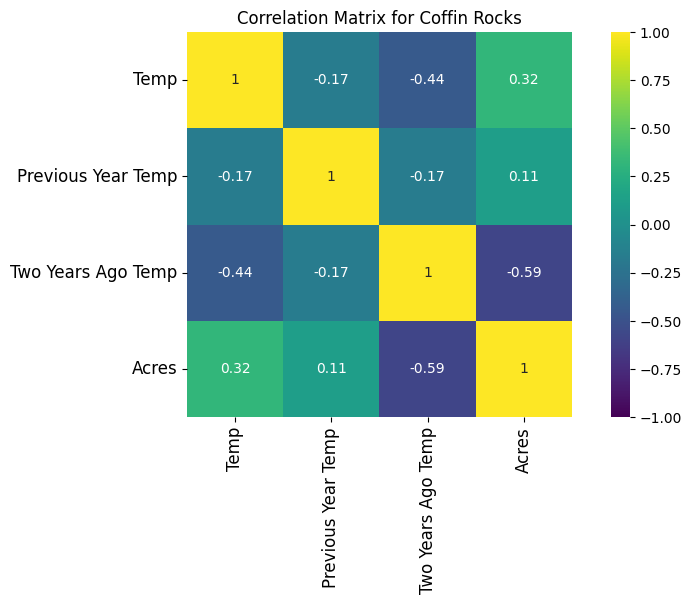

In [122]:
coff_rocks_df = merged_df[merged_df['Bed Name'] == 'Coffin Rocks'].copy()

# Sort by Bed Name/Site Code and Survey Date to ensure correct lagging
coff_rocks_df = coff_rocks_df.sort_values(by=['Site Code', 'Survey Date'])

# Drop duplicate rows based on 'Bed Name', 'Site Code', and 'Survey Date'
coff_rocks_df = coff_rocks_df.drop_duplicates(subset=['Bed Name', 'Site Code', 'Survey Date'], keep='first').copy()

# Calculate Previous Year Temp by grouping and shifting
# If there are multiple surveys within a year for the same site, this might need adjustment
coff_rocks_df['Previous Year Temp'] = coff_rocks_df.groupby(['Site Code'])['Temp'].shift(1)

coff_rocks_df['Two Years Ago Temp'] = coff_rocks_df.groupby(['Site Code'])['Temp'].shift(2)

predictor_variables = ['Temp', 'Survey Date', 'Previous Year Temp', 'Two Years Ago Temp']

# Filter for numerical predictors that actually exist in the DataFrame
numerical_predictors = coff_rocks_df[predictor_variables].select_dtypes(include='number').columns.to_list()

# Add the 'Previous Year Temp' column to the list if it exists
if 'Previous Year Temp' in coff_rocks_df.columns:
    numerical_predictors.append('Previous Year Temp')
    # Remove duplicates if any
    numerical_predictors = list(dict.fromkeys(numerical_predictors))

# Drop rows with NaN values in the relevant columns before correlation
coff_rocks_df_cleaned = coff_rocks_df.dropna(subset=[col for col in ['Temp', 'Previous Year Temp', 'Two Years Ago Temp'] if col in coff_rocks_df.columns])

corr_matrix = coff_rocks_df_cleaned[numerical_predictors + ["Acres"]].corr()

plt.figure(figsize=(10, 5))

sns.heatmap(
    corr_matrix, vmax=1, vmin=-1, square=True, annot=True, cmap="viridis"
)

plt.tick_params(labelsize=12)

plt.title('Correlation Matrix for Coffin Rocks')
plt.show()

In [123]:
print(f"Number of rows assessed for correlation in Coffin Rocks {len(coff_rocks_df_cleaned)}")

Number of rows assessed for correlation in Coffin Rocks 25


Month of July correlation matrix

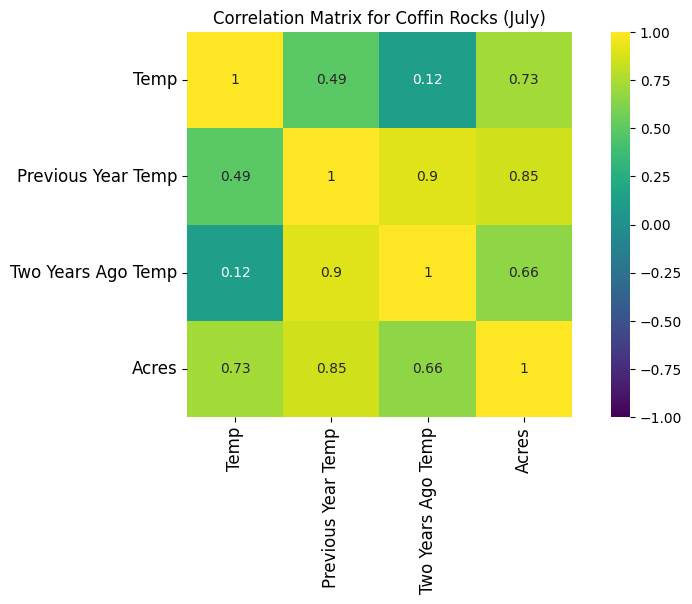

In [124]:
coff_rocks_july_df = merged_df[(merged_df['Bed Name'] == 'Coffin Rocks') & (merged_df['Survey Month'] == 7)].copy()

# Sort by Site Code and Survey Date to ensure correct lagging
coff_rocks_july_df = coff_rocks_july_df.sort_values(by=['Site Code', 'Survey Date'])

# Drop duplicate rows based on 'Bed Name', 'Site Code', and 'Survey Date'
coff_rocks_july_df = coff_rocks_july_df.drop_duplicates(subset=['Bed Name', 'Site Code', 'Survey Date'], keep='first').copy()

# Calculate Previous Year Temp by grouping and shifting
coff_rocks_july_df['Previous Year Temp'] = coff_rocks_july_df.groupby(['Site Code'])['Temp'].shift(1)

coff_rocks_july_df['Two Years Ago Temp'] = coff_rocks_july_df.groupby(['Site Code'])['Temp'].shift(2)

predictor_variables_july = ['Temp', 'Previous Year Temp', 'Two Years Ago Temp']

# Filter for numerical predictors that actually exist in the DataFrame
numerical_predictors_july = coff_rocks_july_df[predictor_variables_july].select_dtypes(include='number').columns.to_list()

# Drop rows with NaN values in the relevant columns before correlation
coff_rocks_july_df_cleaned = coff_rocks_july_df.dropna(subset=[col for col in ['Temp', 'Previous Year Temp', 'Two Years Ago Temp'] if col in coff_rocks_july_df.columns])

corr_matrix_july = coff_rocks_july_df_cleaned[numerical_predictors_july + ["Acres"]].corr()

plt.figure(figsize=(10, 5))

sns.heatmap(
    corr_matrix_july, vmax=1, vmin=-1, square=True, annot=True, cmap="viridis"
)

plt.tick_params(labelsize=12)

plt.title('Correlation Matrix for Coffin Rocks (July)')
plt.show()

In [125]:
print(f"Number of rows assessed for correlation in Coffin Rocks in July: {len(coff_rocks_july_df_cleaned)}")

Number of rows assessed for correlation in Coffin Rocks in July: 6


Month of August Correlation Matrix

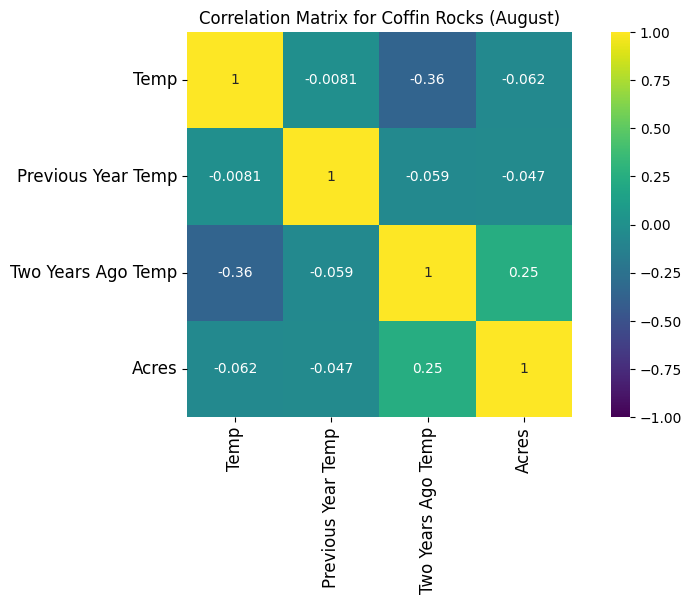

In [126]:
coff_rocks_aug_df = merged_df[(merged_df['Bed Name'] == 'Coffin Rocks') & (merged_df['Survey Month'] == 8)].copy()

# Sort by Site Code and Survey Date to ensure correct lagging
coff_rocks_aug_df = coff_rocks_aug_df.sort_values(by=['Site Code', 'Survey Date'])

# Drop duplicate rows based on 'Bed Name', 'Site Code', and 'Survey Date'
coff_rocks_aug_df = coff_rocks_aug_df.drop_duplicates(subset=['Bed Name', 'Site Code', 'Survey Date'], keep='first').copy()

# Calculate Previous Year Temp by grouping and shifting
coff_rocks_aug_df['Previous Year Temp'] = coff_rocks_aug_df.groupby(['Site Code'])['Temp'].shift(1)

coff_rocks_aug_df['Two Years Ago Temp'] = coff_rocks_aug_df.groupby(['Site Code'])['Temp'].shift(2)

predictor_variables_aug = ['Temp', 'Previous Year Temp', 'Two Years Ago Temp']

# Filter for numerical predictors that actually exist in the DataFrame
numerical_predictors_aug = coff_rocks_aug_df[predictor_variables_aug].select_dtypes(include='number').columns.to_list()

# Drop rows with NaN values in the relevant columns before correlation
coff_rocks_aug_df_cleaned = coff_rocks_aug_df.dropna(subset=[col for col in ['Temp', 'Previous Year Temp', 'Two Years Ago Temp'] if col in coff_rocks_aug_df.columns])

corr_matrix_aug = coff_rocks_aug_df_cleaned[numerical_predictors_aug + ["Acres"]].corr()

plt.figure(figsize=(10, 5))

sns.heatmap(
    corr_matrix_aug, vmax=1, vmin=-1, square=True, annot=True, cmap="viridis"
)

plt.tick_params(labelsize=12)

plt.title('Correlation Matrix for Coffin Rocks (August)')
plt.show()

In [127]:
print(f"Number of rows assessed for correlation in Coffin Rocks in August: {len(coff_rocks_aug_df_cleaned)}")

Number of rows assessed for correlation in Coffin Rocks in August: 6


Month of September Correlation Matrix

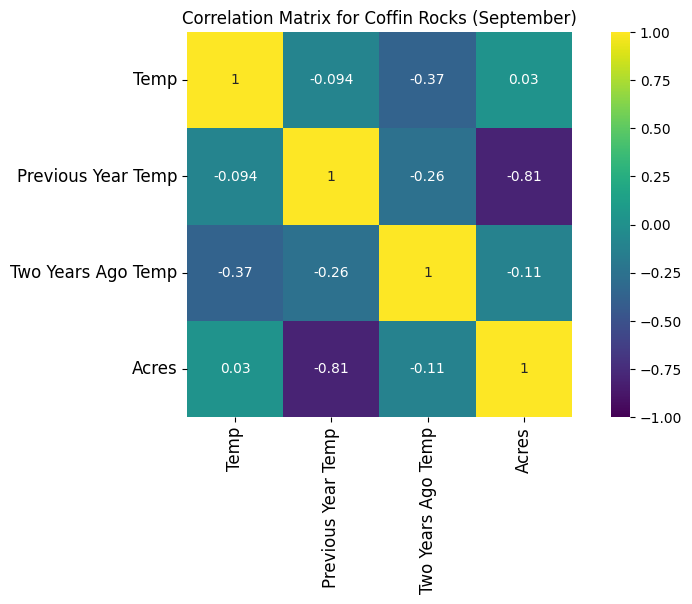

In [129]:
coff_rocks_sep_df = merged_df[(merged_df['Bed Name'] == 'Coffin Rocks') & (merged_df['Survey Month'] == 9)].copy()

# Sort by Site Code and Survey Date to ensure correct lagging
coff_rocks_sep_df = coff_rocks_sep_df.sort_values(by=['Site Code', 'Survey Date'])

# Drop duplicate rows based on 'Bed Name', 'Site Code', and 'Survey Date'
coff_rocks_sep_df = coff_rocks_sep_df.drop_duplicates(subset=['Bed Name', 'Site Code', 'Survey Date'], keep='first').copy()

# Calculate Previous Year Temp by grouping and shifting
coff_rocks_sep_df['Previous Year Temp'] = coff_rocks_sep_df.groupby(['Site Code'])['Temp'].shift(1)

coff_rocks_sep_df['Two Years Ago Temp'] = coff_rocks_sep_df.groupby(['Site Code'])['Temp'].shift(2)

predictor_variables_sep = ['Temp', 'Previous Year Temp', 'Two Years Ago Temp']

# Filter for numerical predictors that actually exist in the DataFrame
numerical_predictors_sep = coff_rocks_sep_df[predictor_variables_sep].select_dtypes(include='number').columns.to_list()

# Drop rows with NaN values in the relevant columns before correlation
coff_rocks_sep_df_cleaned = coff_rocks_sep_df.dropna(subset=[col for col in ['Temp', 'Previous Year Temp', 'Two Years Ago Temp'] if col in coff_rocks_sep_df.columns])

corr_matrix_sep = coff_rocks_sep_df_cleaned[numerical_predictors_sep + ["Acres"]].corr()

plt.figure(figsize=(10, 5))

sns.heatmap(
    corr_matrix_sep, vmax=1, vmin=-1, square=True, annot=True, cmap="viridis"
)

plt.tick_params(labelsize=12)

plt.title('Correlation Matrix for Coffin Rocks (September)')
plt.show()

In [130]:
print(f"Number of rows assessed for correlation in Coffin Rocks in September: {len(coff_rocks_sep_df_cleaned)}")

Number of rows assessed for correlation in Coffin Rocks in September: 5


##Lowell Correlation Matrices

Correlation Matrix by ALL months

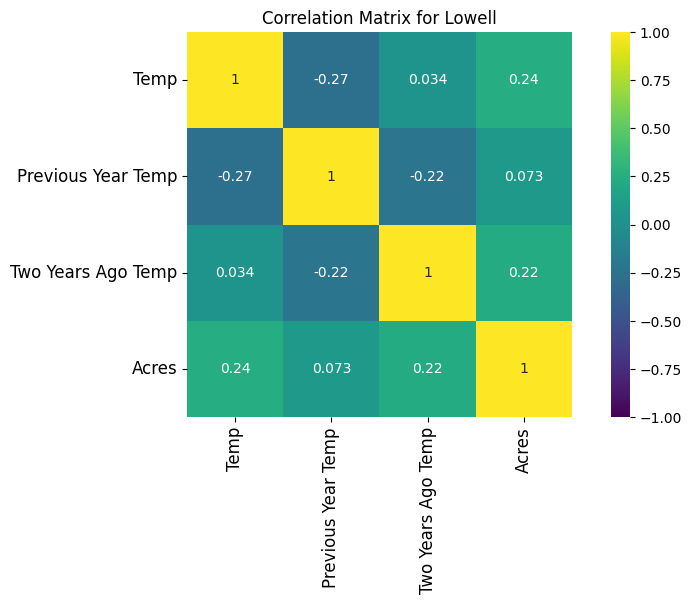

In [131]:
lowell_df = merged_df[merged_df['Bed Name'] == 'Lowell'].copy()

# Sort by Bed Name/Site Code and Survey Date to ensure correct lagging
lowell_df = lowell_df.sort_values(by=['Site Code', 'Survey Date'])

# Drop duplicate rows based on 'Bed Name', 'Site Code', and 'Survey Date'
lowell_df = lowell_df.drop_duplicates(subset=['Bed Name', 'Site Code', 'Survey Date'], keep='first').copy()

# Calculate Previous Year Temp by grouping and shifting

lowell_df['Previous Year Temp'] = lowell_df.groupby(['Site Code'])['Temp'].shift(1)

lowell_df['Two Years Ago Temp'] = lowell_df.groupby(['Site Code'])['Temp'].shift(2)

predictor_variables_lowell = ['Temp', 'Survey Date', 'Previous Year Temp', 'Two Years Ago Temp']

# Filter for numerical predictors that actually exist in the DataFrame
numerical_predictors_lowell = lowell_df[predictor_variables_lowell].select_dtypes(include='number').columns.to_list()

# Add the 'Previous Year Temp' column to the list if it exists
if 'Previous Year Temp' in lowell_df.columns:
    numerical_predictors_lowell.append('Previous Year Temp')
    # Remove duplicates if any
    numerical_predictors_lowell = list(dict.fromkeys(numerical_predictors_lowell))

# Drop rows with NaN values in the relevant columns before correlation
lowell_df_cleaned = lowell_df.dropna(subset=[col for col in ['Temp', 'Previous Year Temp', 'Two Years Ago Temp'] if col in lowell_df.columns])

corr_matrix_lowell = lowell_df_cleaned[numerical_predictors_lowell + ["Acres"]].corr()

plt.figure(figsize=(10, 5))

sns.heatmap(
    corr_matrix_lowell, vmax=1, vmin=-1, square=True, annot=True, cmap="viridis"
)

plt.tick_params(labelsize=12)

plt.title('Correlation Matrix for Lowell')
plt.show()

In [132]:
print(f"Number of rows assessed for correlation in Lowell: {len(lowell_df_cleaned)}")

Number of rows assessed for correlation in Lowell: 15


Month of July Correlation

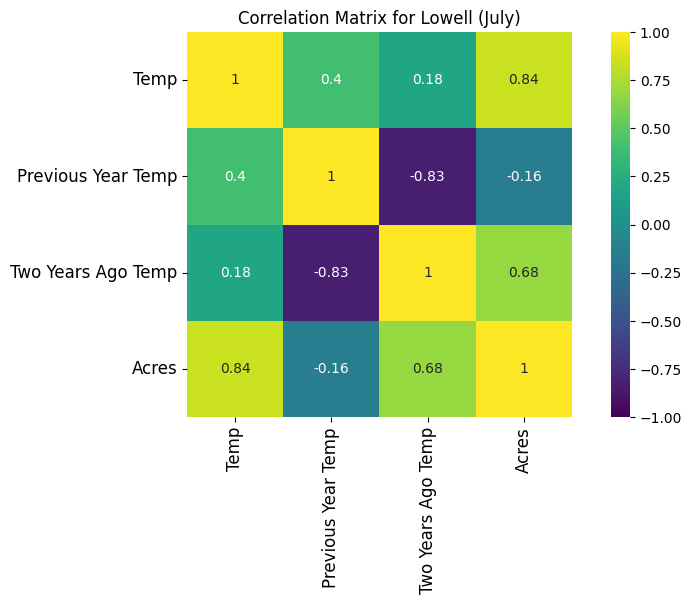

In [133]:
lowell_df_july = merged_df[(merged_df['Bed Name'] == 'Lowell') & (merged_df['Survey Month'] == 7)].copy()

# Sort by Bed Name/Site Code and Survey Date to ensure correct lagging
lowell_df_july = lowell_df_july.sort_values(by=['Site Code', 'Survey Date'])

# Drop duplicate rows based on 'Bed Name', 'Site Code', and 'Survey Date'
lowell_df_july = lowell_df_july.drop_duplicates(subset=['Bed Name', 'Site Code', 'Survey Date'], keep='first').copy()

# Calculate Previous Year Temp by grouping and shifting
# If there are multiple surveys within a year for the same site, this might need adjustment
lowell_df_july['Previous Year Temp'] = lowell_df_july.groupby(['Site Code'])['Temp'].shift(1)

lowell_df_july['Two Years Ago Temp'] = lowell_df_july.groupby(['Site Code'])['Temp'].shift(2)

predictor_variables_lowell_july = ['Temp', 'Survey Date', 'Previous Year Temp', 'Two Years Ago Temp']

# Filter for numerical predictors that actually exist in the DataFrame
numerical_predictors_lowell_july = lowell_df_july[predictor_variables_lowell_july].select_dtypes(include='number').columns.to_list()

# Add the 'Previous Year Temp' column to the list if it exists
if 'Previous Year Temp' in lowell_df_july.columns:
    numerical_predictors_lowell_july.append('Previous Year Temp')
    # Remove duplicates if any
    numerical_predictors_lowell_july = list(dict.fromkeys(numerical_predictors_lowell_july))

# Drop rows with NaN values in the relevant columns before correlation
lowell_df_july_cleaned = lowell_df_july.dropna(subset=[col for col in ['Temp', 'Previous Year Temp', 'Two Years Ago Temp'] if col in lowell_df_july.columns])

corr_matrix_lowell_july = lowell_df_july_cleaned[numerical_predictors_lowell_july + ["Acres"]].corr()

plt.figure(figsize=(10, 5))

sns.heatmap(
    corr_matrix_lowell_july, vmax=1, vmin=-1, square=True, annot=True, cmap="viridis"
)

plt.tick_params(labelsize=12)

plt.title('Correlation Matrix for Lowell (July)')
plt.show()

In [134]:
print(f"Number of rows assessed for correlation in Lowell in July: {len(lowell_df_july_cleaned)}")

Number of rows assessed for correlation in Lowell in July: 3


Month of August Correlation

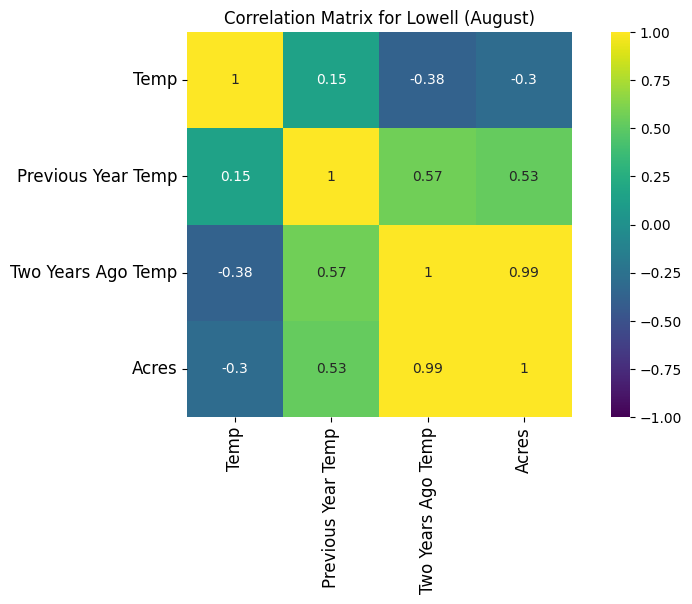

In [135]:
lowell_df_aug = merged_df[(merged_df['Bed Name'] == 'Lowell') & (merged_df['Survey Month'] == 8)].copy()

# Sort by Bed Name/Site Code and Survey Date to ensure correct lagging
lowell_df_aug = lowell_df_aug.sort_values(by=['Site Code', 'Survey Date'])

# Drop duplicate rows based on 'Bed Name', 'Site Code', and 'Survey Date'
lowell_df_aug = lowell_df_aug.drop_duplicates(subset=['Bed Name', 'Site Code', 'Survey Date'], keep='first').copy()

# Calculate Previous Year Temp by grouping and shifting
# If there are multiple surveys within a year for the same site, this might need adjustment
lowell_df_aug['Previous Year Temp'] = lowell_df_aug.groupby(['Site Code'])['Temp'].shift(1)

lowell_df_aug['Two Years Ago Temp'] = lowell_df_aug.groupby(['Site Code'])['Temp'].shift(2)

predictor_variables_lowell_aug = ['Temp', 'Survey Date', 'Previous Year Temp', 'Two Years Ago Temp']

# Filter for numerical predictors that actually exist in the DataFrame
numerical_predictors_lowell_aug = lowell_df_aug[predictor_variables_lowell_aug].select_dtypes(include='number').columns.to_list()

# Add the 'Previous Year Temp' column to the list if it exists
if 'Previous Year Temp' in lowell_df_aug.columns:
    numerical_predictors_lowell_aug.append('Previous Year Temp')
    # Remove duplicates if any
    numerical_predictors_lowell_aug = list(dict.fromkeys(numerical_predictors_lowell_aug))

# Drop rows with NaN values in the relevant columns before correlation
lowell_df_aug_cleaned = lowell_df_aug.dropna(subset=[col for col in ['Temp', 'Previous Year Temp', 'Two Years Ago Temp'] if col in lowell_df_aug.columns])

corr_matrix_lowell_aug = lowell_df_aug_cleaned[numerical_predictors_lowell_aug + ["Acres"]].corr()

plt.figure(figsize=(10, 5))

sns.heatmap(
    corr_matrix_lowell_aug, vmax=1, vmin=-1, square=True, annot=True, cmap="viridis"
)

plt.tick_params(labelsize=12)

plt.title('Correlation Matrix for Lowell (August)')
plt.show()

In [136]:
print(f"Number of rows assessed for correlation in Lowell in August: {len(lowell_df_aug_cleaned)}")

Number of rows assessed for correlation in Lowell in August: 4


Month of September Correlation

Please note that "two years" was left out for september, as there is no data

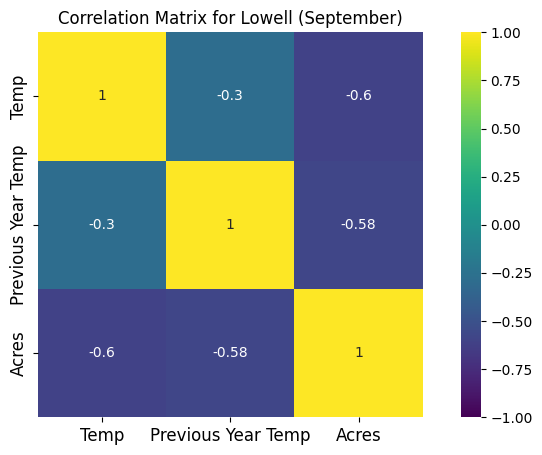

In [137]:
lowell_df_sep = merged_df[(merged_df['Bed Name'] == 'Lowell') & (merged_df['Survey Month'] == 9)].copy()

# Sort by Bed Name/Site Code and Survey Date to ensure correct lagging
lowell_df_sep = lowell_df_sep.sort_values(by=['Site Code', 'Survey Date'])

# Drop duplicate rows based on 'Bed Name', 'Site Code', and 'Survey Date'
lowell_df_sep = lowell_df_sep.drop_duplicates(subset=['Bed Name', 'Site Code', 'Survey Date'], keep='first').copy()

# Calculate Previous Year Temp by grouping and shifting
# If there are multiple surveys within a year for the same site, this might need adjustment
lowell_df_sep['Previous Year Temp'] = lowell_df_sep.groupby(['Site Code'])['Temp'].shift(1)

# Note: 'Two Years Ago Temp' is intentionally not calculated here as per previous analysis for this subset.

predictor_variables_lowell_sep = ['Temp', 'Survey Date', 'Previous Year Temp']

# Filter for numerical predictors that actually exist in the DataFrame
numerical_predictors_lowell_sep = lowell_df_sep[predictor_variables_lowell_sep].select_dtypes(include='number').columns.to_list()

# Add the 'Previous Year Temp' column to the list if it exists
if 'Previous Year Temp' in lowell_df_sep.columns:
    numerical_predictors_lowell_sep.append('Previous Year Temp')
    # Remove duplicates if any
    numerical_predictors_lowell_sep = list(dict.fromkeys(numerical_predictors_lowell_sep))

# Drop rows with NaN values in the relevant columns before correlation
lowell_df_sep_cleaned = lowell_df_sep.dropna(subset=[col for col in ['Temp', 'Previous Year Temp'] if col in lowell_df_sep.columns])

corr_matrix_lowell_sep = lowell_df_sep_cleaned[numerical_predictors_lowell_sep + ["Acres"]].corr()

plt.figure(figsize=(10, 5))

sns.heatmap(
    corr_matrix_lowell_sep, vmax=1, vmin=-1, square=True, annot=True, cmap="viridis"
)

plt.tick_params(labelsize=12)

plt.title('Correlation Matrix for Lowell (September)')
plt.show()

In [138]:
print(f"Number of rows assessed for correlation in Lowell in September: {len(lowell_df_sep_cleaned)}")

Number of rows assessed for correlation in Lowell in September: 3


##Hoypus Point Correlation Matrices

Correlation for ALL months

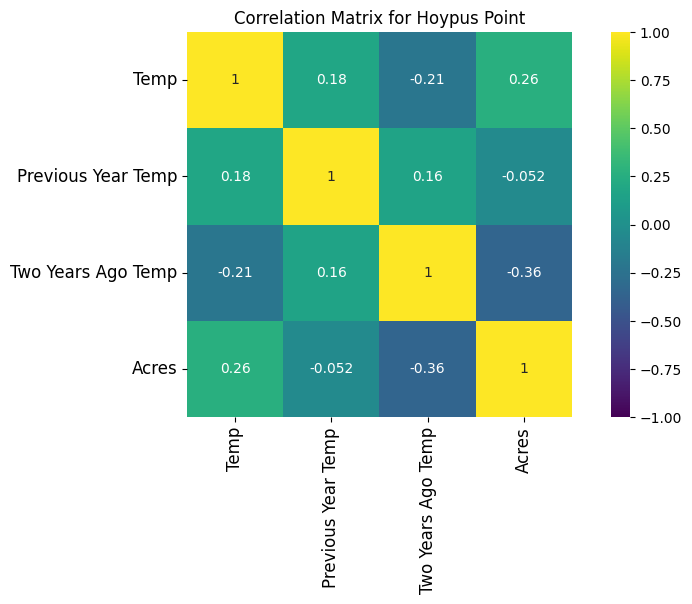

In [139]:
hoypus_df = merged_df[merged_df['Bed Name'] == 'Hoypus Point'].copy()

# Sort by Bed Name/Site Code and Survey Date to ensure correct lagging
hoypus_df = hoypus_df.sort_values(by=['Site Code', 'Survey Date'])

# Drop duplicate rows based on 'Bed Name', 'Site Code', and 'Survey Date'
hoypus_df = hoypus_df.drop_duplicates(subset=['Bed Name', 'Site Code', 'Survey Date'], keep='first').copy()

# Calculate Previous Year Temp by grouping and shifting
# If there are multiple surveys within a year for the same site, this might need adjustment
hoypus_df['Previous Year Temp'] = hoypus_df.groupby(['Site Code'])['Temp'].shift(1)

hoypus_df['Two Years Ago Temp'] = hoypus_df.groupby(['Site Code'])['Temp'].shift(2)

predictor_variables_hoypus = ['Temp', 'Survey Date', 'Previous Year Temp', 'Two Years Ago Temp']

# Filter for numerical predictors that actually exist in the DataFrame
numerical_predictors_hoypus = hoypus_df[predictor_variables_hoypus].select_dtypes(include='number').columns.to_list()

# Add the 'Previous Year Temp' column to the list if it exists
if 'Previous Year Temp' in hoypus_df.columns:
    numerical_predictors_hoypus.append('Previous Year Temp')
    # Remove duplicates if any
    numerical_predictors_hoypus = list(dict.fromkeys(numerical_predictors_hoypus))

# Drop rows with NaN values in the relevant columns before correlation
hoypus_df_cleaned = hoypus_df.dropna(subset=[col for col in ['Temp', 'Previous Year Temp', 'Two Years Ago Temp'] if col in hoypus_df.columns])

corr_matrix_hoypus = hoypus_df_cleaned[numerical_predictors_hoypus + ["Acres"]].corr()

plt.figure(figsize=(10, 5))

sns.heatmap(
    corr_matrix_hoypus, vmax=1, vmin=-1, square=True, annot=True, cmap="viridis"
)

plt.tick_params(labelsize=12)

plt.title('Correlation Matrix for Hoypus Point')
plt.show()

In [140]:
print(f"Number of rows assessed for correlation at Hoypus Point: {len(hoypus_df_cleaned)}")

Number of rows assessed for correlation at Hoypus Point: 18


Month of July

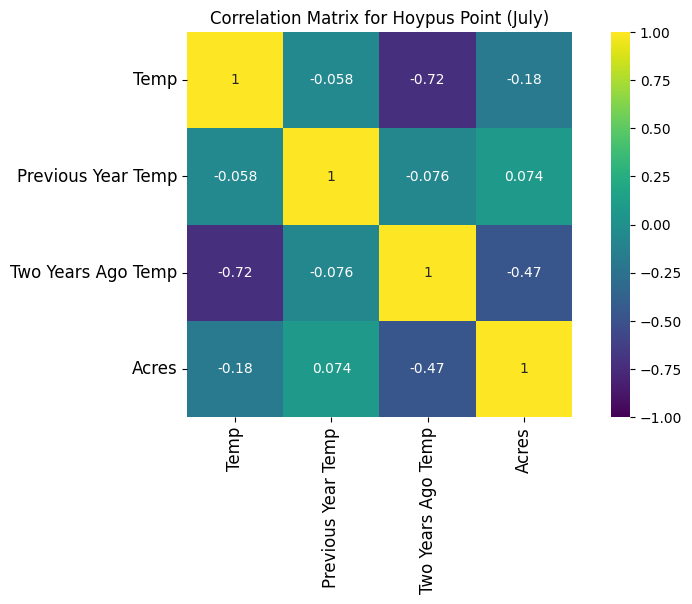

In [141]:
hoypus_df_july = merged_df[(merged_df['Bed Name'] == 'Hoypus Point') & (merged_df['Survey Month'] == 7)].copy()

# Sort by Bed Name/Site Code and Survey Date to ensure correct lagging
hoypus_df_july = hoypus_df_july.sort_values(by=['Site Code', 'Survey Date'])

# Drop duplicate rows based on 'Bed Name', 'Site Code', and 'Survey Date'
hoypus_df_july = hoypus_df_july.drop_duplicates(subset=['Bed Name', 'Site Code', 'Survey Date'], keep='first').copy()

# Calculate Previous Year Temp by grouping and shifting
# If there are multiple surveys within a year for the same site, this might need adjustment
hoypus_df_july['Previous Year Temp'] = hoypus_df_july.groupby(['Site Code'])['Temp'].shift(1)

hoypus_df_july['Two Years Ago Temp'] = hoypus_df_july.groupby(['Site Code'])['Temp'].shift(2)

predictor_variables_hoypus_july = ['Temp', 'Survey Date', 'Previous Year Temp', 'Two Years Ago Temp']

# Filter for numerical predictors that actually exist in the DataFrame
numerical_predictors_hoypus_july = hoypus_df_july[predictor_variables_hoypus_july].select_dtypes(include='number').columns.to_list()

# Add the 'Previous Year Temp' column to the list if it exists
if 'Previous Year Temp' in hoypus_df_july.columns:
    numerical_predictors_hoypus_july.append('Previous Year Temp')
    # Remove duplicates if any
    numerical_predictors_hoypus_july = list(dict.fromkeys(numerical_predictors_hoypus_july))

# Drop rows with NaN values in the relevant columns before correlation
hoypus_df_july_cleaned = hoypus_df_july.dropna(subset=[col for col in ['Temp', 'Previous Year Temp', 'Two Years Ago Temp'] if col in hoypus_df_july.columns])

corr_matrix_hoypus_july = hoypus_df_july_cleaned[numerical_predictors_hoypus_july + ["Acres"]].corr()

plt.figure(figsize=(10, 5))

sns.heatmap(
    corr_matrix_hoypus_july, vmax=1, vmin=-1, square=True, annot=True, cmap="viridis"
)

plt.tick_params(labelsize=12)

plt.title('Correlation Matrix for Hoypus Point (July)')
plt.show()

In [142]:
print(f"Number of rows assessed for correlation at Hoypus Point in July: {len(hoypus_df_july_cleaned)}")

Number of rows assessed for correlation at Hoypus Point in July: 5


In [90]:
display(hoypus_df_july.head())

,Bed Name,Site Code,Survey Date,Survey Day,Survey Month,Survey Year,Acres,Temp,Previous Year Temp,Two Years Ago Temp
27,Hoypus Point,HOYP,2016-07-19,19,7,2016,4.042001,14.0,NaN,NaN
26,Hoypus Point,HOYP,2016-07-22,22,7,2016,1.134140,12.0,14.0,NaN
130,Hoypus Point,HOYP,2017-07-25,25,7,2017,3.605778,10.0,12.0,14.0
187,Hoypus Point,HOYP,2018-07-17,17,7,2018,2.968767,13.0,10.0,12.0
368,Hoypus Point,HOYP,2022-07-18,18,7,2022,3.944428,13.0,13.0,10.0


In [91]:
display(hoypus_df_july_cleaned.head())

,Bed Name,Site Code,Survey Date,Survey Day,Survey Month,Survey Year,Acres,Temp,Previous Year Temp,Two Years Ago Temp
130,Hoypus Point,HOYP,2017-07-25,25,7,2017,3.605778,10.00,12.0,14.0
187,Hoypus Point,HOYP,2018-07-17,17,7,2018,2.968767,13.00,10.0,12.0
368,Hoypus Point,HOYP,2022-07-18,18,7,2022,3.944428,13.00,13.0,10.0
388,Hoypus Point,HOYP,2023-07-20,20,7,2023,2.761130,12.70,13.0,13.0
421,Hoypus Point,HOYP,2024-07-18,18,7,2024,2.374159,12.05,12.7,13.0


Month of August Correlation

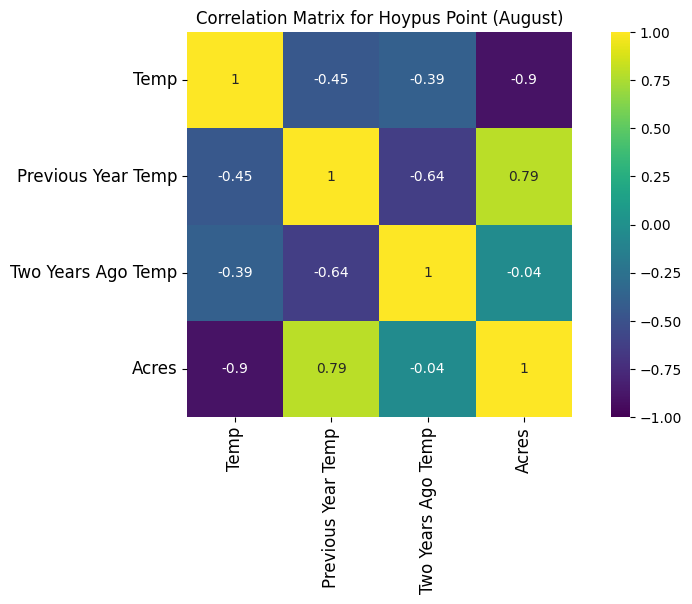

In [143]:
hoypus_df_aug = merged_df[(merged_df['Bed Name'] == 'Hoypus Point') & (merged_df['Survey Month'] == 8)].copy()

# Sort by Bed Name/Site Code and Survey Date to ensure correct lagging
hoypus_df_aug = hoypus_df_aug.sort_values(by=['Site Code', 'Survey Date'])

# Drop duplicate rows based on 'Bed Name', 'Site Code', and 'Survey Date'
hoypus_df_aug = hoypus_df_aug.drop_duplicates(subset=['Bed Name', 'Site Code', 'Survey Date'], keep='first').copy()

# Calculate Previous Year Temp by grouping and shifting
# If there are multiple surveys within a year for the same site, this might need adjustment
hoypus_df_aug['Previous Year Temp'] = hoypus_df_aug.groupby(['Site Code'])['Temp'].shift(1)

hoypus_df_aug['Two Years Ago Temp'] = hoypus_df_aug.groupby(['Site Code'])['Temp'].shift(2)

predictor_variables_hoypus_aug = ['Temp', 'Survey Date', 'Previous Year Temp', 'Two Years Ago Temp']

# Filter for numerical predictors that actually exist in the DataFrame
numerical_predictors_hoypus_aug = hoypus_df_aug[predictor_variables_hoypus_aug].select_dtypes(include='number').columns.to_list()

# Add the 'Previous Year Temp' column to the list if it exists
if 'Previous Year Temp' in hoypus_df_aug.columns:
    numerical_predictors_hoypus_aug.append('Previous Year Temp')
    # Remove duplicates if any
    numerical_predictors_hoypus_aug = list(dict.fromkeys(numerical_predictors_hoypus_aug))

# Drop rows with NaN values in the relevant columns before correlation
hoypus_df_aug_cleaned = hoypus_df_aug.dropna(subset=[col for col in ['Temp', 'Previous Year Temp', 'Two Years Ago Temp'] if col in hoypus_df_aug.columns])

corr_matrix_hoypus_aug = hoypus_df_aug_cleaned[numerical_predictors_hoypus_aug + ["Acres"]].corr()

plt.figure(figsize=(10, 5))

sns.heatmap(
    corr_matrix_hoypus_aug, vmax=1, vmin=-1, square=True, annot=True, cmap="viridis"
)

plt.tick_params(labelsize=12)

plt.title('Correlation Matrix for Hoypus Point (August)')
plt.show()

In [144]:
print(f"Number of rows assessed for correlation at Hoypus Point in August: {len(hoypus_df_aug_cleaned)}")

Number of rows assessed for correlation at Hoypus Point in August: 3


In [93]:
display(hoypus_df_aug.head())

,Bed Name,Site Code,Survey Date,Survey Day,Survey Month,Survey Year,Acres,Temp,Previous Year Temp,Two Years Ago Temp
25,Hoypus Point,HOYP,2016-08-19,19,8,2016,3.712156,14.00,NaN,NaN
182,Hoypus Point,HOYP,2018-08-14,14,8,2018,7.488670,13.00,14.0,NaN
311,Hoypus Point,HOYP,2021-08-11,11,8,2021,2.108597,15.00,13.0,14.0
381,Hoypus Point,HOYP,2023-08-15,15,8,2023,3.468347,13.70,15.0,13.0
420,Hoypus Point,HOYP,2024-08-16,16,8,2024,3.406280,12.85,13.7,15.0


In [94]:
display(hoypus_df_aug_cleaned.head())

,Bed Name,Site Code,Survey Date,Survey Day,Survey Month,Survey Year,Acres,Temp,Previous Year Temp,Two Years Ago Temp
311,Hoypus Point,HOYP,2021-08-11,11,8,2021,2.108597,15.00,13.0,14.0
381,Hoypus Point,HOYP,2023-08-15,15,8,2023,3.468347,13.70,15.0,13.0
420,Hoypus Point,HOYP,2024-08-16,16,8,2024,3.406280,12.85,13.7,15.0


Month of September Correlation

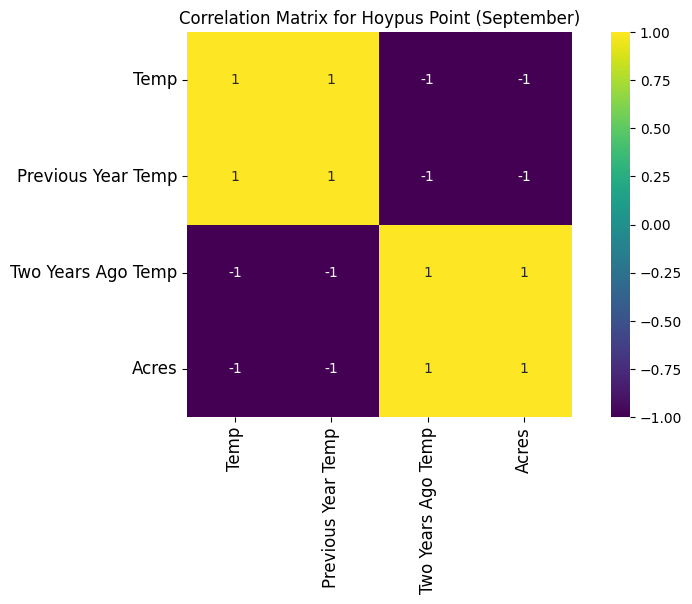

In [145]:
hoypus_df_sep = merged_df[(merged_df['Bed Name'] == 'Hoypus Point') & (merged_df['Survey Month'] == 9)].copy()

# Sort by Bed Name/Site Code and Survey Date to ensure correct lagging
hoypus_df_sep = hoypus_df_sep.sort_values(by=['Site Code', 'Survey Date'])

# Drop duplicate rows based on 'Bed Name', 'Site Code', and 'Survey Date'
hoypus_df_sep = hoypus_df_sep.drop_duplicates(subset=['Bed Name', 'Site Code', 'Survey Date'], keep='first').copy()

# Calculate Previous Year Temp by grouping and shifting
# If there are multiple surveys within a year for the same site, this might need adjustment
hoypus_df_sep['Previous Year Temp'] = hoypus_df_sep.groupby(['Site Code'])['Temp'].shift(1)

hoypus_df_sep['Two Years Ago Temp'] = hoypus_df_sep.groupby(['Site Code'])['Temp'].shift(2)

predictor_variables_hoypus_sep = ['Temp', 'Survey Date', 'Previous Year Temp', 'Two Years Ago Temp']

# Filter for numerical predictors that actually exist in the DataFrame
numerical_predictors_hoypus_sep = hoypus_df_sep[predictor_variables_hoypus_sep].select_dtypes(include='number').columns.to_list()

# Add the 'Previous Year Temp' column to the list if it exists
if 'Previous Year Temp' in hoypus_df_sep.columns:
    numerical_predictors_hoypus_sep.append('Previous Year Temp')
    # Remove duplicates if any
    numerical_predictors_hoypus_sep = list(dict.fromkeys(numerical_predictors_hoypus_sep))

# Drop rows with NaN values in the relevant columns before correlation
hoypus_df_sep_cleaned = hoypus_df_sep.dropna(subset=[col for col in ['Temp', 'Previous Year Temp', 'Two Years Ago Temp'] if col in hoypus_df_sep.columns])

corr_matrix_hoypus_sep = hoypus_df_sep_cleaned[numerical_predictors_hoypus_sep + ["Acres"]].corr()

plt.figure(figsize=(10, 5))

sns.heatmap(
    corr_matrix_hoypus_sep, vmax=1, vmin=-1, square=True, annot=True, cmap="viridis"
)

plt.tick_params(labelsize=12)

plt.title('Correlation Matrix for Hoypus Point (September)')
plt.show()

In [146]:
print(f"Number of rows assessed for correlation at Hoypus Point in September: {len(hoypus_df_sep_cleaned)}")

Number of rows assessed for correlation at Hoypus Point in September: 2
